## Trigonometric interpolation

**Notation**

| symbol | meaning |
|---|---|
| $\bar u$ | complex conjugate of $u$ (element-wise complex conjugate for vector or matrix) |
| $i$ | $=\sqrt{-1}$ imaginary unit |
| $v^H$, $A^H$, $v^*$, $A^*$ | $\overline{v}^T$, $\overline{A}^T$, where $v$ and $A$ are complex vector and matrix respectively (called *conjugate transpose*) |
| $(u, v)$ | $v^H u = \sum_{j=1}^n u_j \overline{v_j}$, where $u,v\in C^n$ (Complex dot-product) |
| $\lVert v \rVert$ | $\sqrt{(v, v)}$, where $v\in C^n$ (2-norm of complex vector) |
<!-- | $\mathfrak{i}$ | $=\sqrt{-1}$ imaginary unit (watch the font! $i$ vs $\mathfrak{i}=\sqrt{-1}$) | -->


### Facts on complex numbers

Background knowledge of complex numbers

- Sauer (2017) pp. 490--492 provides essential summary of complex numbers.
- If this is not enough, you can find a balanced summary that is not too long, but quite kind is available at [Brilliant.org](https://brilliant.org/wiki/complex-numbers/).

**Defintion** 

For $z=a+b i\in C$,

- $\bar z = a - b i$ (complex conjugate)
- $\mathrm{Re}(z):=a\in R$ (real part) 
- $\mathrm{Im}(z):=b\in R$ (imaginary part).
- $|z|:=\sqrt{z\bar z}=\sqrt{a^2 + b^2}$ (modulus, maginitude)
- $e^{i \theta} := \cos \theta+i \sin \theta$ (Euler formula)

**Facts**

1. For $0\neq z=a+b i\in C$, it is the case $z=r e^{i \theta}$, where $r = | z |$ and $\theta\in R$ is such that $\cos(\theta)=a/r$ and $\sin(\theta)=b/r$.
2. All exponent rules generalize to complex exponent in the Euler formula settings. That is, for $z,w\in C$ and $n\in Z$, we have
   1. $e^z e^w = e^{z+w}$
   2. $e^z / e^w = e^{z-w}$
   3. $(e^z)^n = e^{nz}$
      1. $(e^z)^w \neq e^{zw}$ in general.
3. If $z\in C$ is on the unit circle, i.e. $|z|=1$, then $z^{-1}=\overline{z}$. In particular, 
   1. $e^{-\theta i}=\overline{e^{\theta i}}$
4. $e^{2\pi k i} = 1$ for any integer $k$.
5. $z$ is real iff $z=\bar z$. 
6. Conjugacy:
   1. $\overline{(\overline{z})}=z$,
   2. $\overline{z+w}=\overline{z}+\overline{w}$,
   3. $\overline{zw}=\overline{z}\overline{w}$,

![polar representation of complex number](https://www.researchgate.net/profile/Ovidiu-Bagdasar/publication/299680029/figure/fig4/AS:647955837108235@1531496118970/Algebraic-and-polar-representation-of-a-complex-number.png)

Figure: Ovidiu Bagdasar - ResearchGate (polar representation of complex number)

**Definition** (Root of unity)

Let $n$ be a positive integer. A complex number $\omega$ satisfying $\omega^n = 1$ is called a *root of unity*. If, in addition, $\omega^k\neq 1$ for $1 \le k < n$, then it is called *primitive root of unity*.

### Discrete Fourier Transform (DFT)

**Theorem** (Orthogonality of primitive roots of unity). 

Let $\omega$ be a primitive $n$-th root of unity and $k$ be an integer.
Then
$$
\sum_{j=0}^{n-1} \omega^{j k}=\left\{\begin{array}{ll}
n & \text { if } k / n \text { is an integer } \\
0 & \text { otherwise }
\end{array} .\right.
$$

In particular, $\omega=e^{\pm 2\pi \mathfrak{i}/n}$ satisfies this.

Proof: HW problem (formal proof)

Proof without words: See the plot below.

In [1]:
# AI usage: This plotting code is written with help of Github Copilot
import numpy as np
import matplotlib.pyplot as plt
def plot_root_of_unity(n):
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    roots = np.exp(1j * angles)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    ax.grid(True)
    
    # Set coordinate limits
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    
    # Plot the unit circle
    circle = plt.Circle((0, 0), 1, color='black', ls=':', fill=False)
    ax.add_artist(circle)
    
    # Plot the primitive roots of unity
    ax.plot(np.real(roots), np.imag(roots), 'bo', markersize=12)
    
    # Add dashed lines connecting each root to the origin
    for root in roots:
        ax.plot([0, np.real(root)], [0, np.imag(root)], 'k:', linewidth=0.5)
    
    # Add x and y coordinate axes as arrows
    ax.arrow(-1.1, 0, 2.2, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
    ax.arrow(0, -1.1, 0, 2.2, head_width=0.05, head_length=0.1, fc='black', ec='black')

    plt.show()    



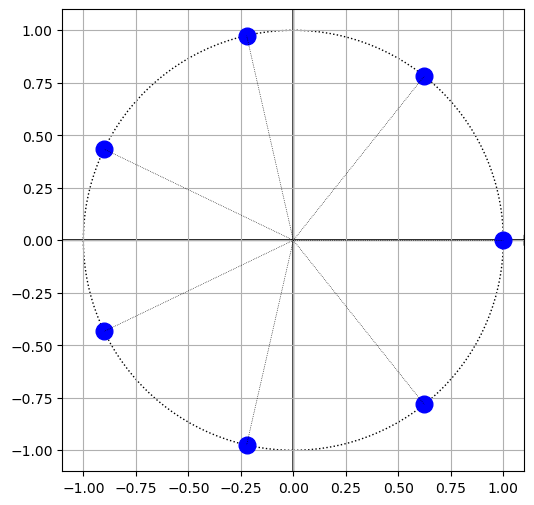

In [3]:
n = 7
plot_root_of_unity(n)

This theorem reads:

$$
\begin{aligned}
1+\omega^0+\omega^0+\omega^0+\cdots+\omega^{0}&=n, \\
1+\omega+\omega^2+\omega^3+\cdots+\omega^{n-1}&=0, \\
1+\omega^2+\omega^4+\omega^6+\cdots+\omega^{2(n-1)} & =0, \\
1+\omega^3+\omega^6+\omega^9+\cdots+\omega^{3(n-1)} & =0, \\
& \vdots \\
1+\omega^{n-1}+\omega^{(n-1) 2}+\omega^{(n-1) 3}+\cdots+\omega^{(n-1)(n-1)} & =0, \\
1+\omega^n+\omega^{2 n}+\omega^{3 n}+\cdots+\omega^{n(n-1)} &= n.
\end{aligned}
$$

For $k > n$, 

$$
\begin{aligned}
1+\omega^{n+1}+\omega^{(n+1)2}+\omega^{(n+1)3}+\cdots+\omega^{(n+1)(n-1)}&=0, \\
1+\omega^{n+2}+\omega^{(n+2)2}+\omega^{(n+2)2}+\cdots+\omega^{(n+2)(n-1)}&=0, \\
& \vdots \\
1+\omega^{2n-1}+\omega^{(2n-1) 2}+\omega^{(2n-1) 3}+\cdots+\omega^{(2n-1)(n-1)} & =0, \\
1+\omega^{2n}+\omega^{4 n}+\omega^{6 n}+\cdots+\omega^{2n(n-1)} &= n.
\end{aligned}
$$

For $k < 0$,

$$
\begin{aligned}
1+\omega^{-n+1}+\omega^{(-n+1)2}+\omega^{(-n+1)3}+\cdots+\omega^{(-n+1)(n-1)}&=0, \\
1+\omega^{-n+2}+\omega^{(-n+2)2}+\omega^{(-n+2)2}+\cdots+\omega^{(-n+2)(n-1)}&=0, \\
& \vdots \\
1+\omega^{-1}+\omega^{(-1) 2}+\omega^{(-1) 3}+\cdots+\omega^{(-1)(n-1)} & =0, \\
1+\omega^{-n}+\omega^{-2 n}+\omega^{-3 n}+\cdots+\omega^{-n(n-1)} &= n.
\end{aligned}
$$


**Definition** (Discrete Fourier Transform)

The Discrete Fourier Transform (DFT) of $x=\left[x_0, \ldots, x_{n-1}\right]^T$ is the $n$-dimensional vector $y=\left[y_0, \ldots, y_{n-1}\right]$, where $\omega=e^{-i 2 \pi / n}$ and
$$
y_k=\frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} x_j \omega^{j k} .
$$

Clicker Question

- Matrix form

$$
\left[\begin{array}{c}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_{n-1}
\end{array}\right]=\left[\begin{array}{c}
a_0+i b_0 \\
a_1+i b_1 \\
a_2+i b_2 \\
\vdots \\
a_{n-1}+i b_{n-1}
\end{array}\right]=\frac{1}{\sqrt{n}}\left[\begin{array}{ccccc}
\omega^0 & \omega^0 & \omega^0 & \cdots & \omega^0 \\
\omega^0 & \omega^1 & \omega^2 & \cdots & \omega^{n-1} \\
\omega^0 & \omega^2 & \omega^4 & \cdots & \omega^{2(n-1)} \\
\omega^0 & \omega^3 & \omega^6 & \cdots & \omega^{3(n-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
\omega^0 & \omega^{n-1} & \omega^{2(n-1)} & \cdots & \omega^{(n-1)^2}
\end{array}\right]\left[\begin{array}{c}
x_0 \\
x_1 \\
x_2 \\
\vdots \\
x_{n-1}
\end{array}\right] .
$$

- The $n \times n$ matrix above is called the Fourier matrix
$$
F_n=\frac{1}{\sqrt{n}}\left[\begin{array}{ccccc}
\omega^0 & \omega^0 & \omega^0 & \cdots & \omega^0 \\
\omega^0 & \omega^1 & \omega^2 & \cdots & \omega^{n-1} \\
\omega^0 & \omega^2 & \omega^4 & \cdots & \omega^{2(n-1)} \\
\omega^0 & \omega^3 & \omega^6 & \cdots & \omega^{3(n-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
\omega^0 & \omega^{n-1} & \omega^{2(n-1)} & \cdots & \omega^{(n-1)^2}
\end{array}\right] .
$$

- (Notation within this class) 
  - For later use, DFT of $n$-vector $v$ without normalization and inverse DFT (IDFT; see below) with $1/n$-normalization.
  - In practice, many packages use different normalization such as Matlab and NumPy.
$$
\begin{split}
\widetilde{\mathrm{DFT}}(v; n)&:=\left[\begin{array}{ccccc}
\omega^0 & \omega^0 & \omega^0 & \cdots & \omega^0 \\
\omega^0 & \omega^1 & \omega^2 & \cdots & \omega^{n-1} \\
\omega^0 & \omega^2 & \omega^4 & \cdots & \omega^{2(n-1)} \\
\omega^0 & \omega^3 & \omega^6 & \cdots & \omega^{3(n-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
\omega^0 & \omega^{n-1} & \omega^{2(n-1)} & \cdots & \omega^{(n-1)^2}
\end{array}\right]  \left[\begin{array}{c}
v_0 \\
v_1 \\
v_2 \\
\vdots \\
v_{n-1}
\end{array}\right] \\
\widetilde{\mathrm{IDFT}}(y; n)&:=\frac{1}{{n}} \left[\begin{array}{ccccc}
\omega^0 & \omega^0 & \omega^0 & \cdots & \omega^0 \\
\omega^0 & \omega^1 & \omega^2 & \cdots & \omega^{n-1} \\
\omega^0 & \omega^2 & \omega^4 & \cdots & \omega^{2(n-1)} \\
\omega^0 & \omega^3 & \omega^6 & \cdots & \omega^{3(n-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
\omega^0 & \omega^{n-1} & \omega^{2(n-1)} & \cdots & \omega^{(n-1)^2}
\end{array}\right] ^{-1} \left[\begin{array}{c}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_{n-1}
\end{array}\right]
\end{split}
$$ 

 


**Remark** (Intuition)

<!-- - Discrete Cosine Transform (DCT) bears the same idea as DFT. Since DFT involves complex numbers, and DCT doesn't, DCT can be visualized easily, and it is often used as a substitute visualization of DFT. -->
- DFT decomposes a wave/signal (input; time domain) into frequencies (output).
- IDFT reconstruct a signal from the frequency profile.

![Discrete Cosine Transform](https://pythonnumericalmethods.studentorg.berkeley.edu/_images/24.02.02-time_frequency.png)

Figure: [Kong, Siauw, Bayen](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html) (Discrete Cosine Transform)

**Definition** (Unitary matrix)

A square complex matrix $U$ is *unitary* if $U^H U= UU^H=I$.

**Facts** (Fourier matrix)

- $y_k=a_k+i b_k$ is a complex number; even when the data is real.
- The first row of $n$-by-$n$ Fourier matrix adds up to $n$. Each of the other rows adds up to 0.
  - This is a consequence of the Orthogonalizty theorem on primitive roots of unity.

- $F_n^{T}=F_n$: (symmetric).
- $F_n^{-1} = F_n^H$: (unitary for the normalization $1/\sqrt{n}$) 
- $F_n^{-1}=\overline{F_n}$. 
  - Proof: HW problem
$$
F_n^{-1}=\frac{1}{\sqrt{n}}\left[\begin{array}{ccccc}
\omega^0 & \omega^0 & \omega^0 & \cdots & \omega^0 \\
\omega^0 & \omega^{-1} & \omega^{-2} & \cdots & \omega^{-(n-1)} \\
\omega^0 & \omega^{-2} & \omega^{-4} & \cdots & \omega^{-2(n-1)} \\
\omega^0 & \omega^{-3} & \omega^{-6} & \cdots & \omega^{-3(n-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
\omega^0 & \omega^{-(n-1)} & \omega^{-2(n-1)} & \cdots & \omega^{-(n-1)^2}
\end{array}\right],
$$

**Definition** (Inverse Discrete Fourier Transform (IDFT))

For $y\in C^n$, the map $y\mapsto F^{-1}_n y \in C^n$ is called Inverse Discrete Fourier Transform.

**Example** (Sauer (2017) p. 494)

Find the DFT of $x=[1, 0, -1, 0]^T$ and $z=[1, 2, 3, 4]^T$.



We do hand calculation for $x$ and computer implementation for $z$
 
<!-- 
Let $\omega$ be the 4th root of unity, or $\omega=e^{-i \pi / 2}=\cos (\pi / 2)-i \sin (\pi / 2)=-i$. Applying the DFT, we get
$$
\left[\begin{array}{l}
y_0 \\
y_1 \\
y_2 \\
y_3
\end{array}\right]=\frac{1}{\sqrt{4}}\left[\begin{array}{llll}
1 & 1 & 1 & 1 \\
1 & \omega & \omega^2 & \omega^3 \\
1 & \omega^2 & \omega^4 & \omega^6 \\
1 & \omega^3 & \omega^6 & \omega^9
\end{array}\right]\left[\begin{array}{r}
1 \\
0 \\
-1 \\
0
\end{array}\right]=\frac{1}{2}\left[\begin{array}{rrrr}
1 & 1 & 1 & 1 \\
1 & -i & -1 & i \\
1 & -1 & 1 & -1 \\
1 & i & -1 & -i
\end{array}\right]\left[\begin{array}{r}
1 \\
0 \\
-1 \\
0
\end{array}\right]=\left[\begin{array}{l}
0 \\
1 \\
0 \\
1
\end{array}\right]
$$ -->

In [7]:
import numpy as np

x = np.array([1., 0., -1., 0.])
z = np.array([1., 2., 3., 4.])

# omega (conjugate of primitive root of unity)
n = x.shape[0]
w = np.exp(2.*np.pi*1j/n)

# intermediate power array (0, 1, 2, 3)
k = np.arange(n)

# 2d array of powers for DFT 
pow = k.reshape((-1, 1)) * k.reshape((1, -1))

# Fourier matrix of dimension 4
F = w**pow

# normalizing constant
nrml = 1./np.sqrt(n)

# DFT of x
y1 = nrml * F @ x.reshape((-1,1))

# DFT of y
y2 = nrml * F @ z.reshape((-1,1))

with np.printoptions(precision=2, suppress=True):
    print(pow)
    print(F)
    print(y1)
    print(y2)


[[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]
 [0 3 6 9]]
[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j -0.-1.j]
 [ 1.+0.j -1.+0.j  1.-0.j -1.+0.j]
 [ 1.+0.j -0.-1.j -1.+0.j  0.+1.j]]
[[0.+0.j]
 [1.-0.j]
 [0.+0.j]
 [1.-0.j]]
[[ 5.+0.j]
 [-1.-1.j]
 [-1.+0.j]
 [-1.+1.j]]


In [3]:
import numpy as np

x = np.array([1., 0., -1., 0.])
z = np.array([1., 2., 3., 4.])

w = np.exp(-2.*np.pi*1j/4)

k = np.arange(4)
pow = (k * k.reshape(-1,1))
F = w**pow
y1 = (1./np.sqrt(4)) * (F @ x)
y2 = (1./np.sqrt(4)) * (F @ z)

with np.printoptions(precision=2, suppress=True):
    print(pow)
    print(F)
    print(y1)
    print(y2)


[[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]
 [0 3 6 9]]
[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.-0.j -0.+1.j]
 [ 1.+0.j -1.-0.j  1.+0.j -1.-0.j]
 [ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]]
[0.+0.j 1.+0.j 0.-0.j 1.+0.j]
[ 5.+0.j -1.+1.j -1.-0.j -1.-1.j]


Clicker Question

**Theorem** (DFT of real vector)

Let $\left\{y_k\right\}$ be the DFT of $\left\{x_j\right\}$, where the $x_j$ are real numbers. Then, 
- $y_0$ is real, and 
- $y_{n-k}=\bar{y}_k$ for $k=1, \ldots, n-1$.
  - Hence, if $n$ is even, $y_{n/2}$ is also real.

###### proof

Proof. 

(First) 

This is clear: $y_0$ is the sum of the $x_j$ 's divided by $\sqrt{n}$

(Second) 

- Observation 1: $\omega^{n-k}=\overline{\omega^k}$ for $k=1,2,\cdots,n$.  
  - $\omega^{n-k}=e^{-i 2 \pi(n-k) / n}=e^{-i 2 \pi} e^{i 2 \pi k / n}=e^{i 2 \pi k / n}=\overline{e^{-i 2 \pi k / n}}=\omega^k$
- Observation 2: $x_j$'s are all real.
  -  $\overline{x_j}=x_j$ for $j=1,2,\cdots,n$.

From the definition of Fourier transform, 
$$
\begin{aligned}
y_{n-k} & =\frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} x_j\left(\omega^{n-k}\right)^j \\
& =\frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} x_j \left(\overline{\omega^k}\right)^j \\
& =\frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} \overline{x_j\left(\omega^k\right)^j}=\overline{y_k} .
\end{aligned}
$$

**Example**

Let $n$ be even and the $x_0, \ldots, x_{n-1}$ be real numbers. Then, the DFT of $x$ replaces them with exactly $n$ other real numbers $a_0, a_1, b_1, a_2, b_2, \ldots, a_{n / 2}$, the real and imaginary parts of the Fourier transform $y_0, \ldots, y_{n-1}$. For example, the $n=8$ DFT has the form
$$
F_8\left[\begin{array}{l}
x_0 \\
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5 \\
x_6 \\
x_7
\end{array}\right]=\left[\begin{array}{l}
a_0 \\
a_1+i b_1 \\
a_2+i b_2 \\
a_3+i b_3 \\
a_4 \\
a_3-i b_3 \\
a_2-i b_2 \\
a_1-i b_1
\end{array}\right]=\left[\begin{array}{c}
y_0 \\
\vdots \\
y_{\frac{n}{2}-1} \\
y_{\frac{n}{2}} \\
\bar{y}_{\frac{n}{2}-1} \\
\vdots \\
\bar{y}_1
\end{array}\right] .
$$

**Remark** 

This property is exploited by software.

- `numpy.fft.rfft` stores only the essential part of the DFT of real data.
  - This improves computation and memory management.
  - But one needs to be a bit more careful because the shapes of the input and output are different.

### Fast Fourier Transform (FFT)

**Motivation**

- DFT applied to an $n$-vector requires $O\left(n^2\right)$ operations ($n^2$ multiplications and $n(n-1)$ additions). 
- Cooley and Tukey [1965] found a way to accomplish the DFT in $O(n \log n)$ operations, called the *Fast Fourier Transform* (FFT). 
- The popularity of the FFT for data analysis followed almost immediately. The field of signal processing converted from primarily analog to digital largely due to this algorithm. [Sauer (2017) p. 495].

**Example** (4-by-4 FFT; Sauer (2017) p. 497)

Here, we omit the normalization part. To complete the DFT with $1/\sqrt{n}$ normalization, simply divide by $\sqrt{n}$ the resulting vector. 



1. Settings
 
Let $\omega=e^{-i 2 \pi / 4}=-i$. The Discrete Fourier Transform reads

$$
\left[\begin{array}{l}
z_0 \\
z_1 \\
z_2 \\
z_3
\end{array}\right]=\left[\begin{array}{cccc}
\omega^0 & \omega^0 & \omega^0 & \omega^0 \\
\omega^0 & \omega^1 & \omega^2 & \omega^3 \\
\omega^0 & \omega^2 & \omega^4 & \omega^6 \\
\omega^0 & \omega^3 & \omega^6 & \omega^9
\end{array}\right]\left[\begin{array}{l}
x_0 \\
x_1 \\
x_2 \\
x_3
\end{array}\right] .
$$



2. Grouping into even and odd index

Group terms according to index being even and odd, then it reads, in the equation form:

$$
\begin{aligned}
& z_0=\omega^0 x_0+\omega^0 x_2+\omega^0\left(\omega^0 x_1+\omega^0 x_3\right) \\
& z_1=\omega^0 x_0+\omega^2 x_2+\omega^1\left(\omega^0 x_1+\omega^2 x_3\right) \\
& z_2=\omega^0 x_0+\omega^4 x_2+\omega^2\left(\omega^0 x_1+\omega^4 x_3\right) \\
& z_3=\omega^0 x_0+\omega^6 x_2+\omega^3\left(\omega^0 x_1+\omega^6 x_3\right)
\end{aligned}.
$$


Lower powers using $\omega^4=1$: 

$$
\begin{aligned}
& z_0=\left(\omega^0 x_0+\omega^0 x_2\right)+\omega^0\left(\omega^0 x_1+\omega^0 x_3\right) \\
& z_1=\left(\omega^0 x_0+\omega^2 x_2\right)+\omega^1\left(\omega^0 x_1+\omega^2 x_3\right) \\
& z_2=\left(\omega^0 x_0+\omega^0 x_2\right)+\omega^2\left(\omega^0 x_1+\omega^0 x_3\right) \\
& z_3=\left(\omega^0 x_0+\omega^2 x_2\right)+\omega^3\left(\omega^0 x_1+\omega^2 x_3\right)
\end{aligned}
$$


3. Recognize repetitions and recursive structure

Notice that each term in parentheses in the top two lines is repeated verbatim in the bottom two lines. 


Also, notice that $\mu=\omega^2$ is a 2nd root of unity. 

$$
\begin{aligned}
& u_0=\mu^0 x_0+\mu^0 x_2\\
& u_1=\mu^0 x_0+\mu^1 x_2
\end{aligned}
$$
and
$$
\begin{aligned}
& v_0=\mu^0 x_1+\mu^0 x_3 \\
& v_1=\mu^0 x_1+\mu^1 x_3,
\end{aligned}
$$
These are DFTs with $n=2$:
$$
\begin{aligned}
& u=\widetilde{\mathrm{DFT}}([x_0, x_2]^T, 2)
& v=\widetilde{\mathrm{DFT}}([x_1, x_3]^T, 2).
\end{aligned}
$$
<!-- 
$$
\begin{aligned}
& u_0=\mu^0 x_0+\mu^0 x_2 \\
& u_1=\mu^0 x_0+\mu^1 x_2
\end{aligned}
$$
and
$$
\begin{aligned}
& v_0=\mu^0 x_1+\mu^0 x_3 \\
& v_1=\mu^0 x_1+\mu^1 x_3,
\end{aligned}
$$
where $\mu=\omega^2$ is a 2nd root of unity. Both $u=\left(u_0, u_1\right)^T$ and $v=\left(v_0, v_1\right)^T$ are essentially DFTs with $n=2$; more precisely,
$$
\begin{aligned}
& u=M_2\left[\begin{array}{l}
x_0 \\
x_2
\end{array}\right] \\
& v=M_2\left[\begin{array}{l}
x_1 \\
x_3
\end{array}\right] .
\end{aligned}
$$ -->



We can write the original $\widetilde{\mathrm{DFT}}([x_0, x_1, x_2, x_3]^T, 4)$ as
$$
\begin{aligned}
& z_0=u_0+\omega^0 v_0 \\
& z_1=u_1+\omega^1 v_1 \\
& z_2=u_0+\omega^2 v_0 \\
& z_3=u_1+\omega^3 v_1 .
\end{aligned}
$$


4. Summarize and exploit

- In summary, the calculation of the $\widetilde{\mathrm{DFT}}(4)$, suppressing the input vector, has been reduced to a pair of $\widetilde{\mathrm{DFT}}(2)$ s plus some extra multiplications and additions.
- More generally and more precisely, $\widetilde{\mathrm{DFT}}(n)$ can be reduced to computing two $\widetilde{\mathrm{DFT}}(n/2)$ s plus $2 n-1$ extra operations ( $n-1$ multiplications and $n$ additions). 
- We can repeat this to $\widetilde{\mathrm{DFT}}(n/2)$ and on recursively.

**Theorem** (Operation Count for FFT; Sauer (2017) p. 497)

Let $n$ be a power of 2. Then the Fast Fourier Transform of size $n$ can be completed in $n\left(2 \log _2 n-1\right)+1$ additions and multiplications, plus a division by $\sqrt{n}$.

Proof: See Sauer (2017) p. 497.

**Remark**

- Complexity of FFT of $n$-dimension is usually denoted by $O(n\log n)$ because $\log_2 n = \frac{1}{\log 2} \log n$: a constant multiple of each other.

##### Inverse Fast Fourer Transform (IFFT)

- Thanks to very nice structure of the Fourier matrix, fast version of Inverse DFT is for free.
  - Given a complex vector $y$, just conjugate, apply the FFT, and conjugate the result because:
$$
F_n^{-1} y=\bar{F}_n y=\overline{F_n \bar{y}} .
$$

**Remark**

- In NumPy, more optimized version of FFT and IFFT are available.
  - `numpy.fft` is a collection of FFT tools.
  - `numpy.fft.fft` and `numpy.fft.ifft` carry out 1D FFT and IFFT respectively.
  - Also, multi-dimensional FFTs are availabe. But you need to know what it does. (Computational project)
- Signal processing makes itself its own science, involving many other details. You will want to consult the documentation if you use FFT seriously. ([NumPy FFT](https://numpy.org/doc/stable/reference/routines.fft.html))

| fft(a[, n, axis, norm]) | Compute the one-dimensional discrete Fourier Transform. |
| :--- | :--- |
| ifft(a[, n, axis, norm]) | Compute the one-dimensional inverse discrete Fourier Transform. |
| fft2(a[, s, axes, norm]) | Compute the 2-dimensional discrete Fourier Transform. |
| ifft2(a[, s, axes, norm]) | Compute the 2-dimensional inverse discrete Fourier Transform. |
| fftn(a[, s, axes, norm]) | Compute the N-dimensional discrete Fourier Transform. |
| ifftn(a[, s, axes, norm]) | Compute the N-dimensional inverse discrete Fourier Transform. |

### Trigonometric Interpolation

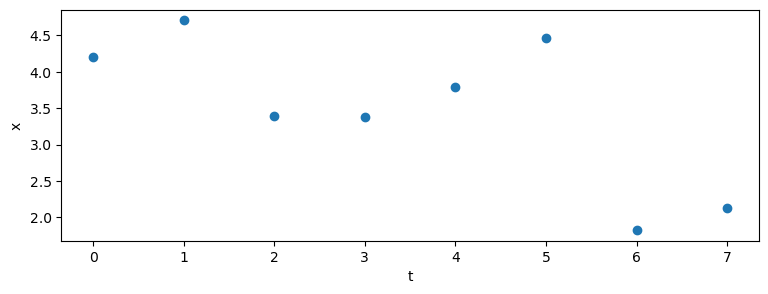

In [4]:
"""Interpolation (only for a figure)
"""
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(8)
y = np.random.uniform(1, 5, size=8)

plt.figure(figsize=(9, 3))  
plt.scatter(x, y)
plt.xlabel('t')
plt.ylabel('x')
plt.show()


**Theorem** (DFT interpolation)

Given an interval $[c, d]$ and positive integer $n$, let $t_j=$ $c+j(d-c) / n$ for $j=0, \ldots, n-1$, and let $x=\left(x_0, \ldots, x_{n-1}\right)$ denote a vector of $n$ numbers. Define $\vec{a}+\vec{b} i=F_n x$, where $F_n$ is the Discrete Fourier Transform matrix. Then the complex function
$$
Q(t)=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1}\left(a_k+i b_k\right) e^{i 2 \pi k(t-c) /(d-c)}
$$
satisfies $Q\left(t_j\right)=x_j$ for $j=0, \ldots, n-1$. 

Furthermore, if the $x_j$ are real, the real function
$$
P(t)=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1}\left(a_k \cos \frac{2 \pi k(t-c)}{d-c}-b_k \sin \frac{2 \pi k(t-c)}{d-c}\right)
$$
satisfies $P\left(t_j\right)=x_j$ for $j=0, \ldots, n-1$.

Proof: This is direct consequence of DFT and IDFT. We will also prove a more general version later.

**Remark** 

- While setting $t_j=$ $c+j(d-c) / n$ for $j=0, \ldots, n-1$ can make it easier when writing a code, setting $c=0$, $d=L$, $h=(d-c)/n$, and $t_j = jh$ makes discussion simpler. 
  - In the latter settings, the exponential and trigonometric functions read: 

$$
e^{ \frac{2k \pi i}{L} t}, \cos\left(\frac{2k \pi i}{L} t\right), \sin\left(\frac{2k \pi i}{L} t\right)
$$

- The second part of the theorem from $P(t)=\mathrm{Re}[Q(t)]$ and $Q(t_j)=P(t_j)$ for $j=0,1,\cdots, n-1$ since $x_j\in R$:
$$
\begin{split}
Q(t)&=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1}\left(a_k+i b_k\right)\left(\cos \frac{2 \pi k(t-c)}{d-c}+i \sin \frac{2 \pi k(t-c)}{d-c}\right)   
\\
&=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1}\left(a_k \cos \frac{2 \pi k(t-c)}{d-c}-b_k \sin \frac{2 \pi k(t-c)}{d-c}\right) 
\\
&\quad + i \frac{1}{\sqrt{n}} \sum_{k=0}^{n-1}\left(b_k \cos \frac{2 \pi k(t-c)}{d-c} + a_k \sin \frac{2 \pi k(t-c)}{d-c}\right).
\end{split}
$$

Clicker question

**Fact**

For $t = j/n$ and  $j\in Z$, we have 

$$
\cos 2(n-k) \pi t=\cos 2 k \pi t \quad \text { and }\quad \sin 2(n-k) \pi t=-\sin 2 k \pi t \text {. }
$$

**Improvement** (Sauer (2017) p. 500)

- When $x_j$'s are real, only the first half of the terms are needed. 
  - By the lemma on the DFT of real data, the coefficients from the latter half of the expansion are the same as those from the first half (except for a change of sign for the sine terms). 
  - Thus, we can obtain the same result by doubling the cosine and sine terms of indices $k=1,2,\cdots,n/2-1$.
    - Cosine: We double them with no complication.
    - Sine: The sign flip in the above fact cancels out another sign flip from the conjugate for real data: $y_{n-k}=\bar{y}_k$, or $b_{n-k} = - b_{k}$ for $k=1,2,\cdots, n/2-1$, which results in doubling the sine terms too.

**Theorem** (DFT interpolation for real data)

For an even integer $n$, let $t_j=c+j(d-c) / n$ for $j=0, \ldots, n-1$, and let $x=$ $\left(x_0, \ldots, x_{n-1}\right)$ denote a vector of $n$ real numbers. Define $\vec{a}+\vec{b} i=F_n x$, where $F_n$ is the Discrete Fourier Transform. Then the function
$$
\begin{aligned}
P_n(t)= & \frac{a_0}{\sqrt{n}}+\frac{2}{\sqrt{n}} \sum_{k=1}^{n / 2-1}\left(a_k \cos \frac{2 k \pi(t-c)}{d-c}-b_k \sin \frac{2 k \pi(t-c)}{d-c}\right) \\
& +\frac{a_{n / 2}}{\sqrt{n}} \cos \frac{n \pi(t-c)}{d-c}
\end{aligned}
$$
satisfies $P_n\left(t_j\right)=x_j$ for $j=0, \ldots, n-1$.

**Example** (Trigonometirc interpolation; Sauer (2017) p. 501)

Find the trigonometric interpolant for the data $x = [−2.2,−2.8,−6.1,−3.9,0.0,1.1,−0.6,−1.1]$ on the interval $[0,1]$ at evenly spaced nodes $t_j = hj$ ($j=0,1,\cdots,7$), $h=1/8$.

The Fourier transform output, accurate to four decimal places, is

$$
y=\left[\begin{array}{ll}
-5.5154 & \\ 
-1.0528  & + 3.6195 i \\ 
1.5910  & - 1.1667 i \\ 
-0.5028  & - 0.2695 i \\ 
-0.7778 & \\ 
-0.5028  & + 0.2695 i \\ 
1.5910  & + 1.1667 i \\ 
-1.0528  & - 3.6195 i 
\end{array}\right]
$$

Therefore, the interpolating function is
$$
\begin{aligned}
P_8(t)= & \frac{-5.5154}{\sqrt{8}}-\frac{1.0528}{\sqrt{2}} \cos 2 \pi t-\frac{3.6195}{\sqrt{2}} \sin 2 \pi t \\
& +\frac{1.5910}{\sqrt{2}} \cos 4 \pi t+\frac{1.1667}{\sqrt{2}} \sin 4 \pi t \\
& -\frac{0.5028}{\sqrt{2}} \cos 6 \pi t+\frac{0.2695}{\sqrt{2}} \sin 6 \pi t \\
& -\frac{0.7778}{\sqrt{8}} \cos 8 \pi t
\end{aligned}
$$

![Trigonometric interpolation](../images/fig_TrigInterpolation.png)

HW problem: Produce this plot with what we have learned.
- Construct Fourier matrix.
- Carry out DFT.
- Extract $a_k$ and $b_k$'s.
- Construct cosine and sine functions evaluated at finer grid points, say 100.
- Take approprate sum.
- Plot data points and interpolation.
- Do not use `fft` package.
- You will want `np.real` and `np.imag` for real and imaginary parts.